<a href="https://colab.research.google.com/github/M-J-Beast/Jup-Uploads/blob/main/Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: SED

Today we will examine spectral energy distribution (SED) of different types of stars. Although still deeply rooted in photometry, it will allow us to look at the emission of stars across the entire electromagnetic spectrum.

With the package we will be using today, if you are running it locally on Windows machine, installation may produce an error (although not always). It should work on Colaboratory without an issue.

In [1]:
!pip install sedfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 93.6 MB/s eta 0:00:00
  Created wheel for sedfit: filename=SEDFit-0.6.1-py3-none-any.whl size=52959817 sha256=e2ca67d404bf7829cab901177cc349bb2e68dbfdecb84e3aca3929bf29233592
  Stored in directory: /root/.cache/pip/wheels/21/f5/35/5feaab6d41b98201ac25d847de673dad395c63c95fb20ec5c0
  Created wheel for dust_extinction: filename=dust_extinction-1.5-py3-none-any.whl size=33

Importing SEDfit the first time after an install will produce a message that could be safely ignored.

In [2]:
from SEDFit.sed import SEDFit
import numpy as np
import matplotlib.pyplot as plt

Configuration file not found:

    /root/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


Let's create an instance of SEDfit.

In [3]:
x=SEDFit(grid_type='btsettl')

Setting up a generic star
Gaia parallax is not available, distance is arbitrarily set by default and should be manually adjusted.
Maximum Av along the line of sight is 10


Now we'll put it some parameters, 1 Rsun, solar Teff, observed from 100 pc through 0 AV of extinction. This will interpolate thorough different models to produce an SED, which we will then plot.

Keep in mind that the resulting spectrum is very low resolution, so many of the features would be very subtle.

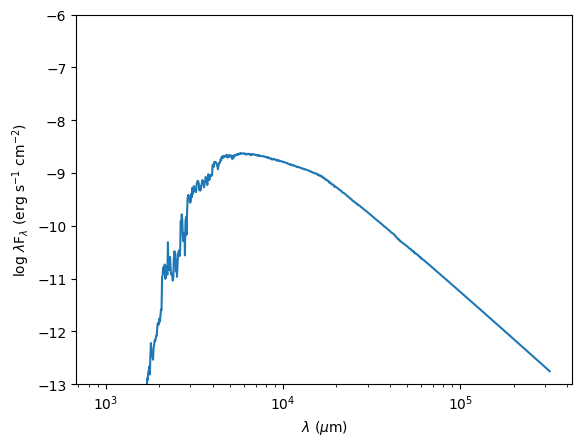

In [4]:
x.addguesses(r=1,teff=5700,dist=100,av=0)
wave1,flux1=x.la,x.fx[0]

plt.plot(wave1,flux1)
plt.xscale('log')
plt.ylim(-13,-6)
plt.xlabel('$\lambda$ ($\mu$m)')
plt.ylabel('log $\lambda$F$_\lambda$ (erg s$^{-1}$ cm$^{-2}$)')
plt.show()

### Caption
The plot shows the log-scaled flux across wavelengths from a solar-type star. The flux is higher at shorter wavelengths (UV and visible), peaking around 0.5 µm, and then gradually decreases toward the infrared. The shape reflects the thermal radiation from a star with these properties, following the blackbody radiation pattern.


Let's examine SED of different stars. Compare SED of stars with Teff=2800, 6000, and 10,000 K. Keep other parameter identical between them.

If you want, you can reuse the same instance of SEDfit with different parameters, or you can define it anew.

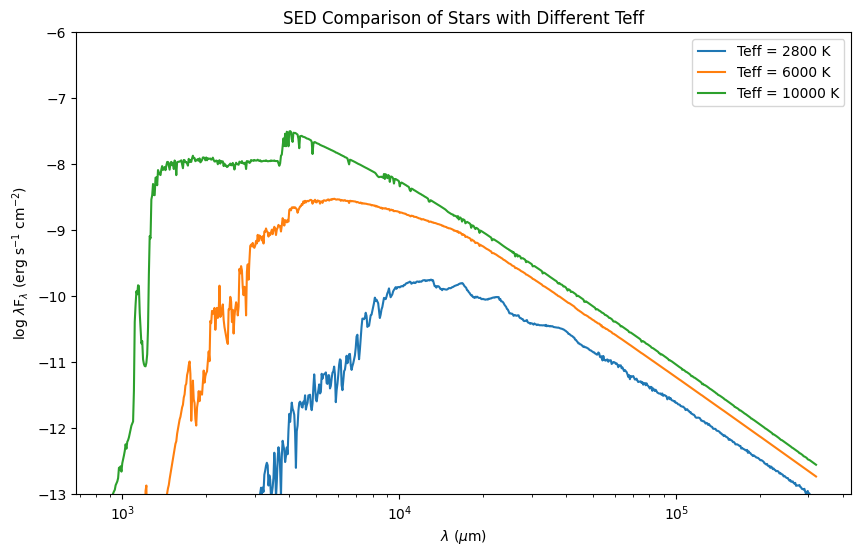

In [5]:
# put your code here

# First star: Teff = 2800 K
x.addguesses(r=1, teff=2800, dist=100, av=0)
wave1, flux1 = x.la, x.fx[0]

# Second star: Teff = 6000 K
x.addguesses(r=1, teff=6000, dist=100, av=0)
wave2, flux2 = x.la, x.fx[0]

# Third star: Teff = 10000 K
x.addguesses(r=1, teff=10000, dist=100, av=0)
wave3, flux3 = x.la, x.fx[0]

# Plotting the SEDs for all stars
plt.figure(figsize=(10,6))
plt.plot(wave1, flux1, label='Teff = 2800 K')
plt.plot(wave2, flux2, label='Teff = 6000 K')
plt.plot(wave3, flux3, label='Teff = 10000 K')

plt.xscale('log')
plt.ylim(-13, -6)
plt.xlabel('$\lambda$ ($\mu$m)')
plt.ylabel('log $\lambda$F$_\lambda$ (erg s$^{-1}$ cm$^{-2}$)')
plt.legend()
plt.title('SED Comparison of Stars with Different Teff')
plt.show()


### Caption
This plot shows the SEDs for stars with Teff = 2800 K, Teff = 6000 K, and Teff = 10,000 K, all with the same radius (R = 1 Rsun) and distance (100 pc). The hotter stars emit more flux, particularly at shorter wavelengths (UV and blue regions), and have their peaks at progressively shorter wavelengths due to Wien's displacement law. The cooler star (2800 K) peaks in the infrared, reflecting its lower temperature and longer-wavelength emission.





#### Question
Compare the three curves.
- In what manner are they similar?
- How do they differ from a perfect blackbody?
- What features are unique to each one?
- What causes the flat region in 10,000 K star?


#### Answer
* All the curves have heavy oscillations as they increase, but have a steady negative slope after the bell curve peak.
* These have more oscillations throughout and not a smooth curve.
* The highest slope has two big jumps, then very small oscillationsalong a flat line until finally decreasing. The middle curve has both small and relatively large jumps in the begining but a fairly smooth downward slope. The bottom curve seems to have the most oscillations even having some noticibale concavities on its downward slope.
* Hydrogen absorption lines cause the flat region.

---
Now we'll fix Teff, and look how the radius effects SED. Using solar Teff, plot three curves, with radius of 0.1, 1, and 10 Rsun.

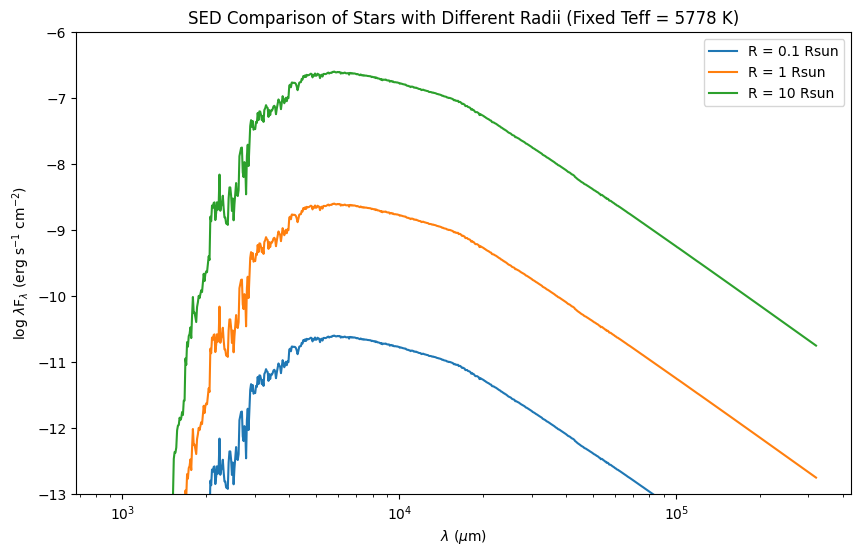

In [6]:
# put your code here
Teff_sun = 5778

# First star: Radius = 0.1 Rsun
x.addguesses(r=0.1, teff=Teff_sun, dist=100, av=0)
wave1, flux1 = x.la, x.fx[0]

# Second star: Radius = 1 Rsun
x.addguesses(r=1, teff=Teff_sun, dist=100, av=0)
wave2, flux2 = x.la, x.fx[0]

# Third star: Radius = 10 Rsun
x.addguesses(r=10, teff=Teff_sun, dist=100, av=0)
wave3, flux3 = x.la, x.fx[0]

# Plotting the SEDs for all radii
plt.figure(figsize=(10,6))
plt.plot(wave1, flux1, label='R = 0.1 Rsun')
plt.plot(wave2, flux2, label='R = 1 Rsun')
plt.plot(wave3, flux3, label='R = 10 Rsun')

plt.xscale('log')
plt.ylim(-13, -6)
plt.xlabel('$\lambda$ ($\mu$m)')
plt.ylabel('log $\lambda$F$_\lambda$ (erg s$^{-1}$ cm$^{-2}$)')
plt.legend()
plt.title('SED Comparison of Stars with Different Radii (Fixed Teff = 5778 K)')
plt.show()


### Caption
This plot shows the SEDs for stars with radii of 0.1 Rsun, 1 Rsun, and 10 Rsun, all having the same effective temperature (Teff = 5778 K) and distance (100 pc). Larger stars emit more flux due to their greater surface area, which increases the total energy output. While the overall shape of the SED remains the same, the flux amplitude increases with increasing radius, reflecting the larger star's greater luminosity.

#### Question
- What effect does the radius have on a star?
- Is the difference caused by the change in apparent or absolute flux?
- Do you expect the trend you see be different for different Teffs?

#### Answer
* Radius mainly affects the total flux (luminosity), with larger stars emitting more energy due to their larger surface area.
* The differences you see are in absolute flux, as the distance is constant in this scenario.
* For stars with different effective temperatures, the trend will change since
Teff has a more significant effect on luminosity than radius.

---


Now let's compare distance. Fixing the radius back to 1 Rsun, compare the SED of a source observed from 10, 100, and 1000 pc.

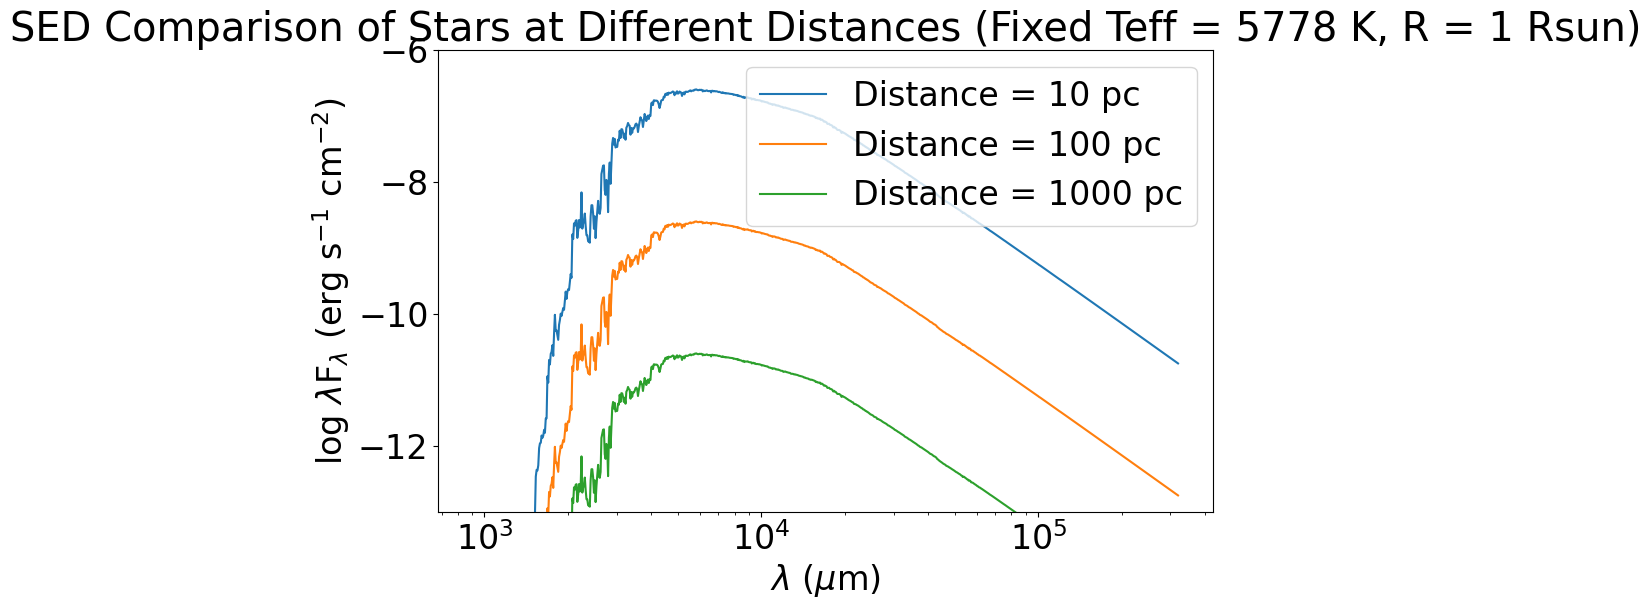

In [101]:
# put your code here

# First star: Distance = 10 pc
x.addguesses(r=1, teff=5778, dist=10, av=0)
wave1, flux1 = x.la, x.fx[0]

# Second star: Distance = 100 pc
x.addguesses(r=1, teff=5778, dist=100, av=0)
wave2, flux2 = x.la, x.fx[0]

# Third star: Distance = 1000 pc
x.addguesses(r=1, teff=5778, dist=1000, av=0)
wave3, flux3 = x.la, x.fx[0]

# Plotting the SEDs for all distances
plt.figure(figsize=(10,6))
plt.plot(wave1, flux1, label='Distance = 10 pc')
plt.plot(wave2, flux2, label='Distance = 100 pc')
plt.plot(wave3, flux3, label='Distance = 1000 pc')

plt.xscale('log')
plt.ylim(-13, -6)
plt.xlabel('$\lambda$ ($\mu$m)')
plt.ylabel('log $\lambda$F$_\lambda$ (erg s$^{-1}$ cm$^{-2}$)')
plt.legend()
plt.title('SED Comparison of Stars at Different Distances (Fixed Teff = 5778 K, R = 1 Rsun)')
plt.show()


### Caption
This plot shows the SEDs for stars at distances of 10 pc, 100 pc, and 1000 pc, all with the same radius (R = 1 Rsun) and effective temperature (Teff = 5778 K). As the distance increases, the apparent flux decreases according to the inverse square law. The stars' intrinsic properties are unchanged, but the farther the star is from the observer, the lower the observed flux, highlighting how distance affects the apparent brightness of a star.

#### Question
- Is the difference in this plot caused by the change in apparent or absolute flux?
- What is the difference between the plot you have made varying distance and the plot you made varying radius?
- How might you differentiate between a small star that is nearby vs large star that is quite distant?

#### Answer
* The change is in apparantd
* The top and bottom curves have switched places
* I would compare both to the middle cuvre and determine the differences in data using the middle curve as a control group

---
Finaly, let's take a look at extinction. Compare the SED of a solar-type star located 100 pc away through AV = 0, 2, and 5 mag

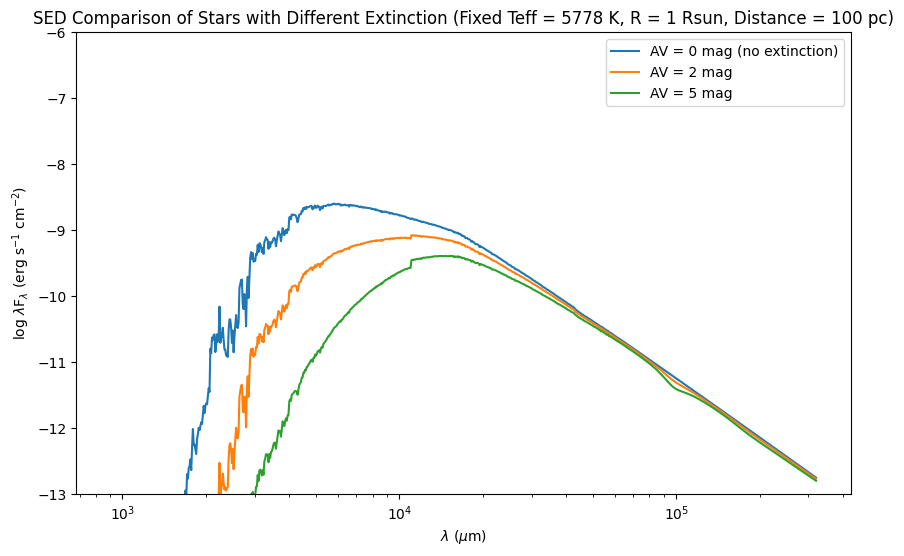

In [8]:

# Fixing Teff and radius for a solar-type star
Teff_sun = 5778
R_sun = 1
dist_pc = 100

# First case: AV = 0 mag (no extinction)
x.addguesses(r=R_sun, teff=Teff_sun, dist=dist_pc, av=0)
wave1, flux1 = x.la, x.fx[0]

# Second case: AV = 2 mag
x.addguesses(r=R_sun, teff=Teff_sun, dist=dist_pc, av=2)
wave2, flux2 = x.la, x.fx[0]

# Third case: AV = 5 mag
x.addguesses(r=R_sun, teff=Teff_sun, dist=dist_pc, av=5)
wave3, flux3 = x.la, x.fx[0]

# Plotting the SEDs for different extinction values
plt.figure(figsize=(10,6))
plt.plot(wave1, flux1, label='AV = 0 mag (no extinction)')
plt.plot(wave2, flux2, label='AV = 2 mag')
plt.plot(wave3, flux3, label='AV = 5 mag')

plt.xscale('log')
plt.ylim(-13, -6)
plt.xlabel('$\lambda$ ($\mu$m)')
plt.ylabel('log $\lambda$F$_\lambda$ (erg s$^{-1}$ cm$^{-2}$)')
plt.legend()
plt.title('SED Comparison of Stars with Different Extinction (Fixed Teff = 5778 K, R = 1 Rsun, Distance = 100 pc)')
plt.show()


### Caption
This plot shows the SEDs for a solar-type star with varying extinction values: AV = 0 mag (no extinction), AV = 2 mag, and AV = 5 mag. Extinction dims the light, especially at shorter wavelengths (UV and visible), causing the SED to become fainter and "redder" as AV increases. The highest extinction (AV = 5 mag) has the most dramatic reduction in flux, particularly in the UV-blue region, while the infrared flux remains less affected.

#### Question
- How does extinction change the SED?
- Let's assume that our detection limit is $10^{-10}$ ergs/s/cm2 regardless of the wavelength. How does the extinction affect the wavelength range across which we can meaningfully obtain flux?
- What is the wavelength range in which the effect of extinction is negligible?

#### Answer

---
Now let's apply SED fitting to determine stellar parameters. We'll provide SEDfit with coordinates of a random star (e.g., TYC 3592-6319-1), and it will query all of the available photometry and parallax.

In [9]:
x=SEDFit('21 08 40.7302412136','+47 01 24.629585952',1,grid_type='btsettl')

 64.0 MiB of 64.0 MiB |  20.9 MiB/s |###################| 100% | ETA:  00:00:00

 62.4 MiB of 64.0 MiB |  22.6 MiB/s |################## |  97% | ETA:   0:00:00INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Gaia XP spectra available
Gaia DR3 distance towards this source is 292.8 pc
3 sigma uncertainty in distance is 290.7 - 295.0 pc
RUWE is 0.792
Maximum Av along the line of sight is 5.57


Let's assume that the distance that is reported above is accurate and requires no modification. The maximum Av that is reported is an upper limit. It can be anything less than that value, but not equal to it. Try to find best radius, Teff, and Av that would fit the source.

In the plot below, black crosses are the measured multi-band photometry (with the corresponding uncertainties), and black curve is low resolution XP spectrum. The red curve is the model flux based on the parameters you provide, and the blue dots is the interpolated model photometry in the passbands for which there are available data. The goal is to make the model match the data, and to minimize the residuals (second panel). It doesn't have to be precise, but try to get it reasonably close.

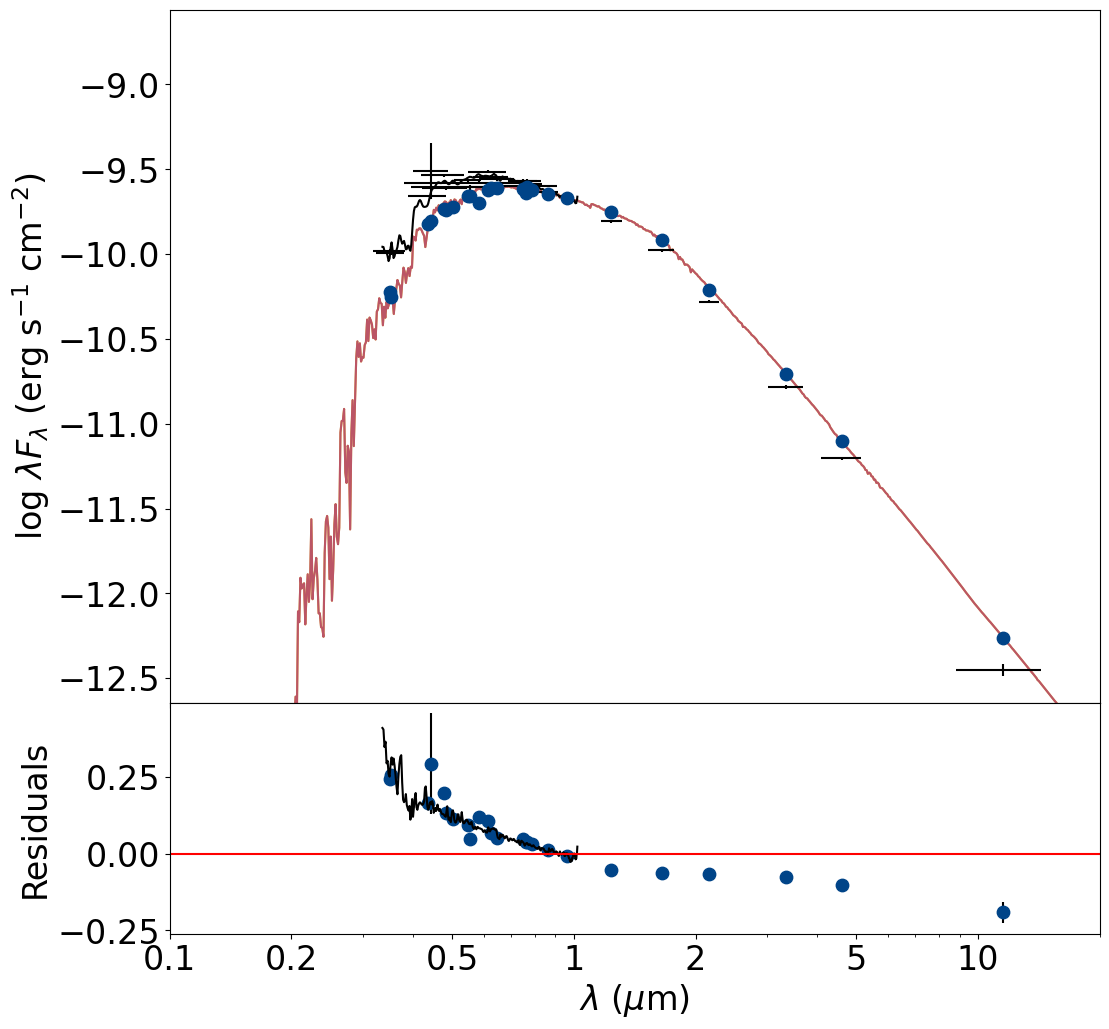

In [98]:


x.addguesses(r=1.13, teff=5900, av=0.6, dist=292.8)
x.makeplot()

# Continue adjusting until the red curve and blue dots closely match the black crosses and curve


### Caption
The plot shows the model fit for a star with an effective temperature (Teff) of 5900 K, radius of 1.13 Rsun, extinction AV = 0.6 mag, and a distance of 292.8 pc. The model, based on the BT-Settl grid, is plotted against the star’s observed spectral energy distribution (SED). The model accounts for both the star's intrinsic properties and the interstellar extinction along the line of sight, aiming to match the observed data.

Now let's repeat this for a different star, HD 102839

In [11]:
y=SEDFit('11 49 56.6154142824','-70 13 32.840828760',1,grid_type='btsettl',wise=False)


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Gaia XP spectra available
Gaia DR3 distance towards this source is 473.9 pc
3 sigma uncertainty in distance is 411.7 - 558.3 pc
RUWE is 2.037, distance measurement may be unreliable, proceed with caution
Maximum Av along the line of sight is 0.911


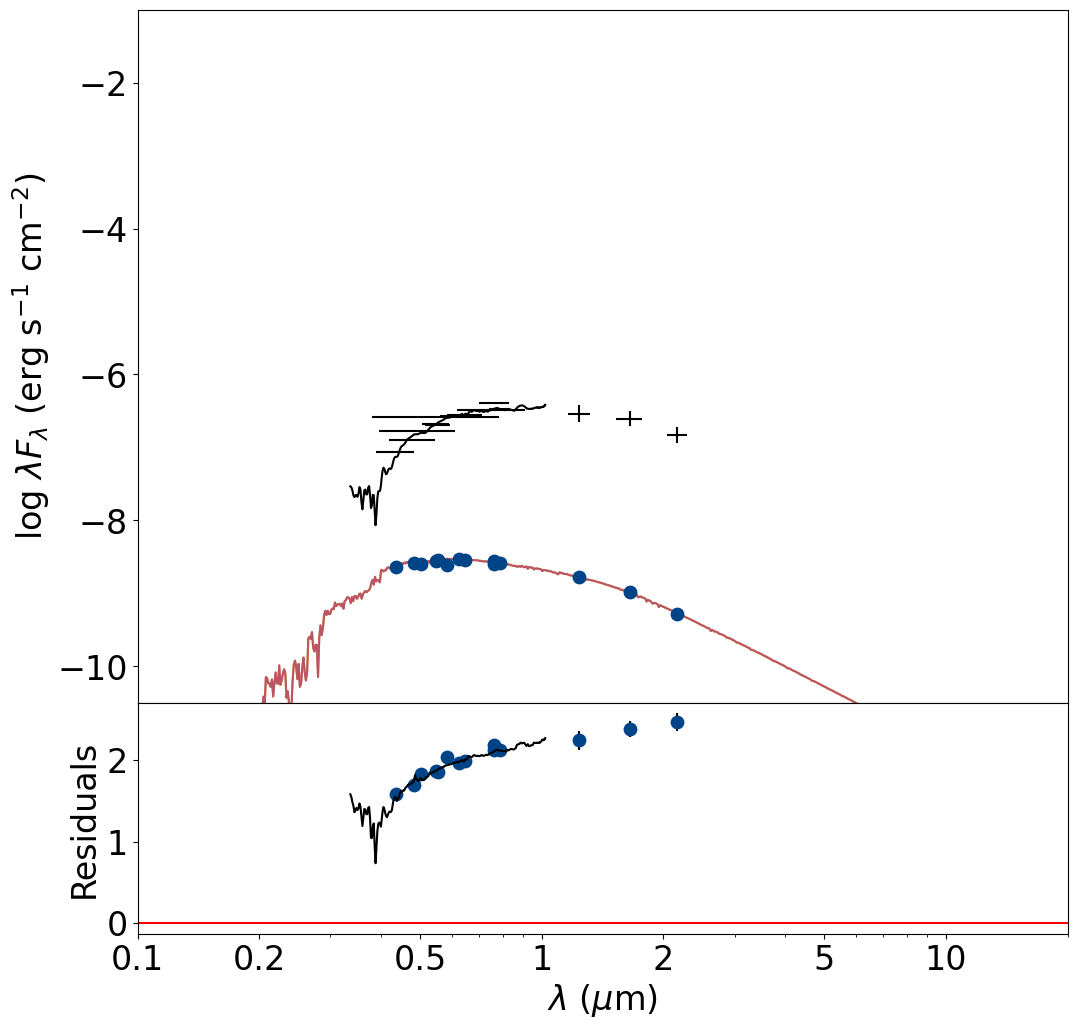

In [106]:

y.addguesses(r=5, teff=6500, av=0.5, dist=473.9)
ax = y.makeplot(getplot=True)
ax[0].set_ylim(-10.5, -1)
plt.show()



### Caption
This plot shows the model fit for the star HD 102839 with an effective temperature (Teff) of 6500 K, radius of 5 Rsun, extinction AV = 0.5 mag, and a distance of 473.9 pc. The SED model (red curve) is compared to the observed data (black curve), and blue points represent the modeled photometry in the corresponding passbands. The model aims to match the star’s observed flux across different wavelengths, accounting for interstellar extinction and distance.

Fitting everything by hand is rarely ideal, not when we have automated fitters. Let's see how well you did in comparison.

TYC 3592-6319-1
Distance: 293.7380110400742 pc
AV: 0.2542903873010461 mag
Radius: [0.9962884844934078] Rsun
Teff: [6110.923302760371] K


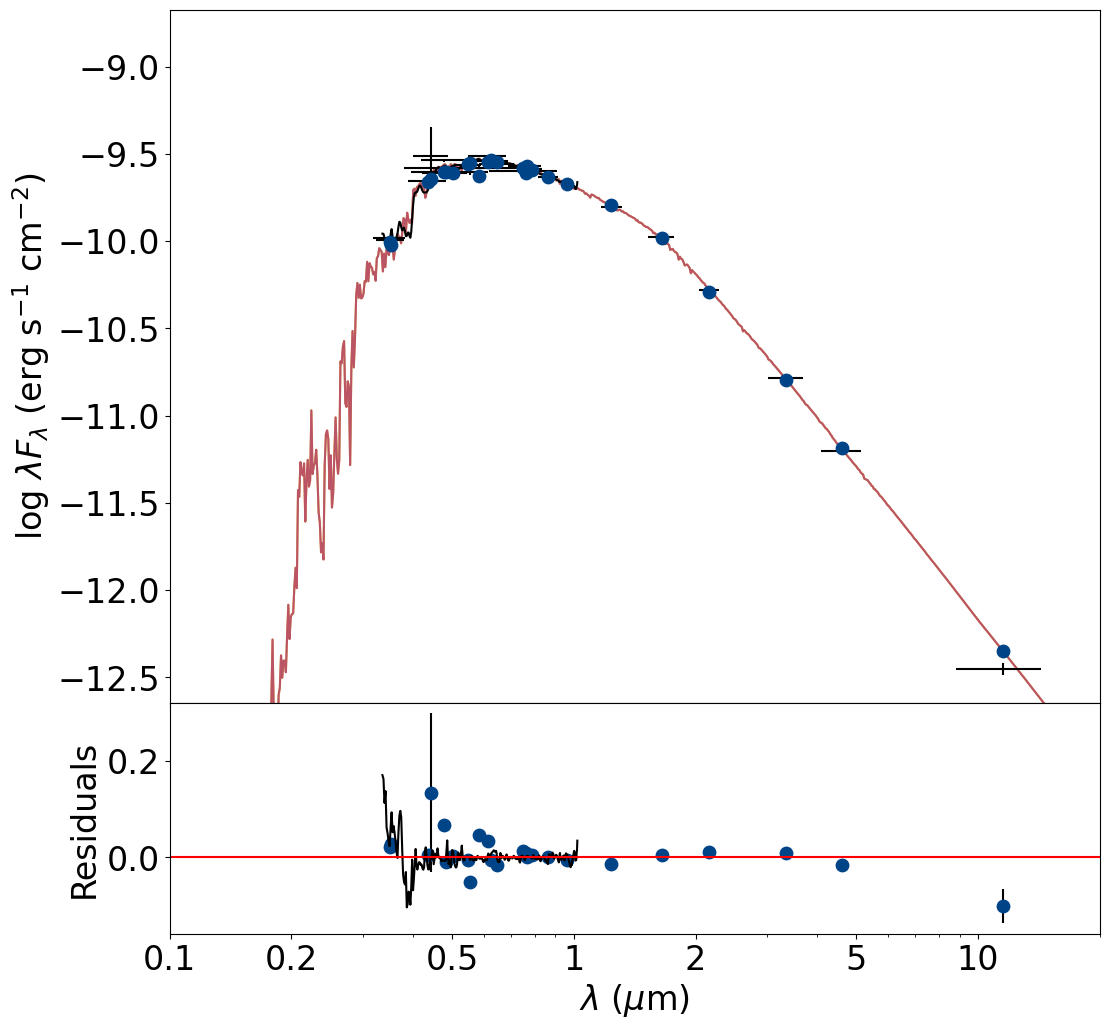

In [93]:
print('TYC 3592-6319-1')
pars=x.fit(fitlogg=False,fitfeh=False)
print("Distance: {} pc".format(x.getdist()))
print("AV: {} mag".format(x.getav()))
print("Radius: {} Rsun".format(x.getr()))
print("Teff: {} K".format(x.getteff()))
x.makeplot()

### Caption
The SED model (red curve) is compared to the observed data (black curve), and the blue points indicate the interpolated model flux in the corresponding photometric passbands. This plot helps to visualize the agreement between the model and the observed photometry and spectrum.

HD 102839
Distance: 473.9 pc
AV: 0.5 mag
Radius: [6] Rsun
Teff: [6500] K


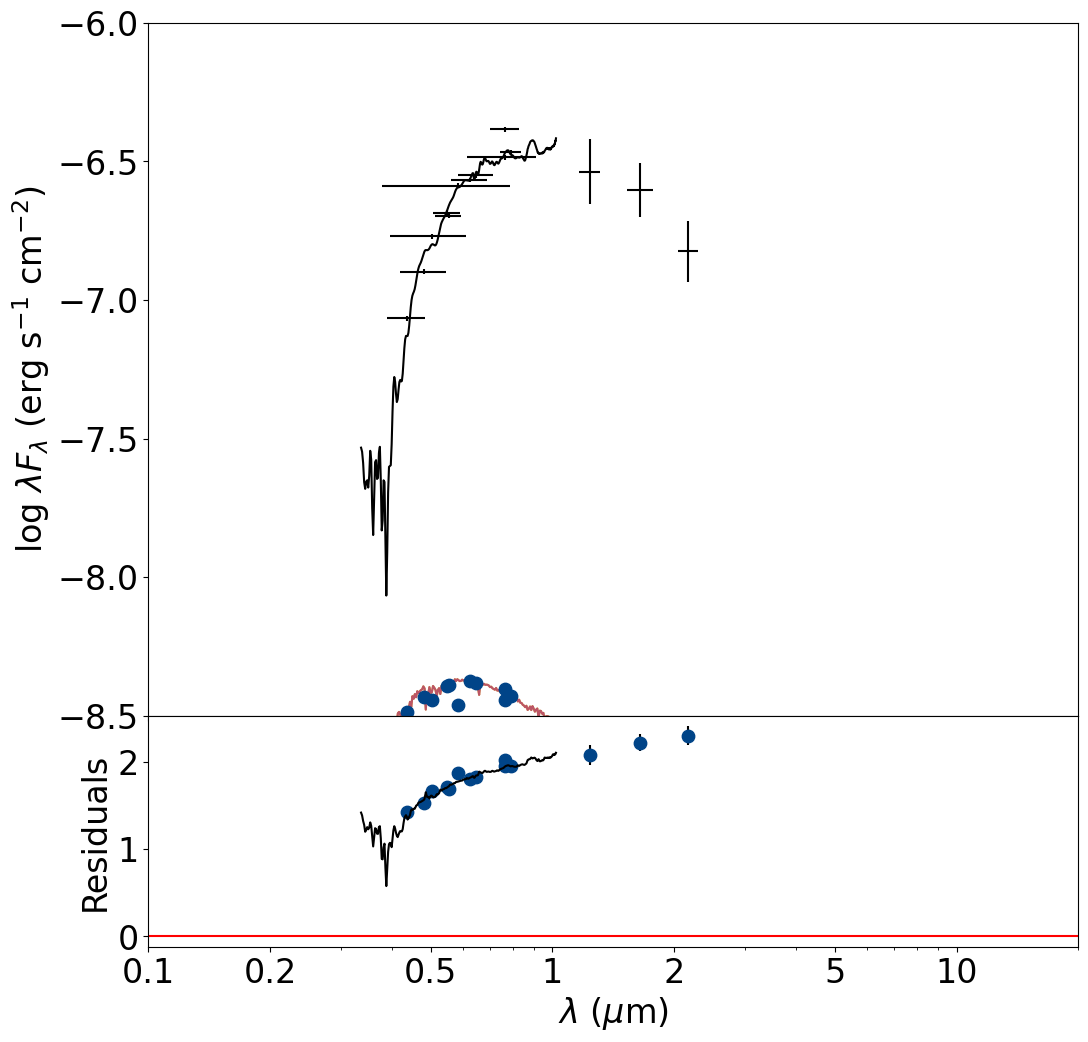

In [94]:
print('HD 102839')
pars=x.fit(fitlogg=False,fitfeh=False)
print("Distance: {} pc".format(y.getdist()))
print("AV: {} mag".format(y.getav()))
print("Radius: {} Rsun".format(y.getr()))
print("Teff: {} K".format(y.getteff()))
ax=y.makeplot(getplot=True)
ax[0].set_ylim(-8.5,-6)
plt.show()

### Caption
The model (red curve) is compared to the observed SED (black curve), with blue points representing the model flux in the photometric passbands. The y-axis is limited between -8.5 and -6 for clearer visualization of the flux. The fit demonstrates how well the model matches the observed photometry and spectra across different wavelengths, considering the star's distance, extinction, and other intrinsic parameters.

#### Question
- How close were you with both of these stars? Be qualitative.
- What were the challenges in fitting everything by hand?

#### Answer
* ΔR = 4.004, Δteff= 390, Δav=0.2458, Δdist = 180.  

* The challenge was trying change one movement at a time while not overadjusting that or a previous change.

----
#### Reflection Questions
- How long did this lab take you?
- What were the areas that were easy?
- What were the areas that presented a challenge?

#### Reflection
* About 5 hr
* plotting and analyzingg the differences in curvs for SED comparisons
* The most challenging part was fitting the SED curves to the black crosses